# Plotting SAARIMA representation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [75]:
df = pd.read_csv("Z:\TCN_clone\TCN\\representations\\representation_matrices\electricity_sarima.csv", index_col=0).fillna(0)
df = df.set_index("id")
df = df.drop(columns=["sigma2"])

In [77]:
df.head()

,ar.L1,ar.L2,ma.L1,ma.S.L24,ar.S.L24,ma.L2,ma.L3,ar.L3
id,,,,,,,,
0,0.426385,0.245966,-0.991123,-0.568900,0.000000,0.000000,0.000000,0.0
1,0.912102,-0.303648,-0.990724,-0.992332,0.356028,0.000000,0.000000,0.0
2,-0.438073,0.408687,-0.006119,-0.996546,-0.165473,-0.993766,0.000000,0.0
3,0.636123,0.000000,-0.958304,-0.860509,0.217689,0.197579,-0.235923,0.0
4,0.817177,-0.180446,-0.941330,-0.864836,0.000000,0.000000,0.000000,0.0


In [89]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df.values)

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(df.values)
cluster_dist = {
        c: len(clusters[np.where(clusters == c)]) for c in range(len(set(clusters)))
    }
for k, v in cluster_dist.items():
    print(f"{k:2} : {v}")

0 : 28
 1 : 15
 2 : 13
 3 : 11
 4 : 78
 5 : 129
 6 : 23
 7 : 16
 8 : 53
 9 : 4


In [81]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=10)
clusters = sc.fit_predict(df.values)
cluster_dist = {
        c: len(clusters[np.where(clusters == c)]) for c in range(len(set(clusters)))
    }
for k, v in cluster_dist.items():
    print(f"{k:2} : {v}")

0 : 323
 1 : 2
 2 : 2
 3 : 7
 4 : 11
 5 : 5
 6 : 2
 7 : 6
 8 : 11
 9 : 1


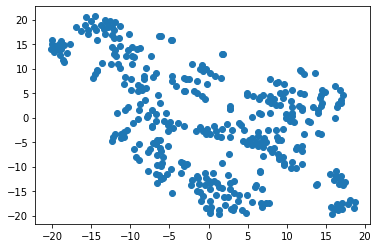

In [90]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = None)#clusters)

In [71]:
df.columns

Index(['ar.L1', 'ar.L2', 'ma.L1', 'ma.S.L24', 'sigma2', 'ar.S.L24', 'ma.L2',
       'ma.L3', 'ar.L3'],
      dtype='object')

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df.values)

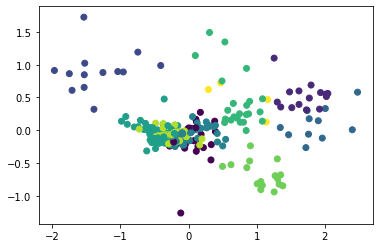

In [87]:
plt.scatter(X[:,0], X[:,1], c=clusters)